<a href="https://colab.research.google.com/github/jijilpgeorge/Employee-Data-Analysis-Report/blob/main/Python_Com_Assmnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python Comprehensive Assesment**

In [ ]:
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/myexcel - myexcel.csv.csv')
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


Preprocessing:

Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis

In [ ]:
# Replace the 'Height' column with random values between 150 and 180
df['Height'] = np.random.randint(150, 181, size=len(df))

# Display the first few rows to verify the changes
print(df.head())


            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25     170     180   
1    Jae Crowder  Boston Celtics      99       SF   25     180     235   
2   John Holland  Boston Celtics      30       SG   27     180     205   
3    R.J. Hunter  Boston Celtics      28       SG   22     167     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29     150     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


**Analysis Tasks:**

1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [ ]:
# Group by team and calculate employee count and percentage
team_distribution = df['Team'].value_counts(normalize=True) *100
team_distribution = pd.DataFrame({'Count': df['Team'].value_counts(), 'Percentage': team_distribution})

print(team_distribution)


                        Count  Percentage
Team                                     
New Orleans Pelicans       19    4.148472
Memphis Grizzlies          18    3.930131
Utah Jazz                  16    3.493450
New York Knicks            16    3.493450
Milwaukee Bucks            16    3.493450
Brooklyn Nets              15    3.275109
Portland Trail Blazers     15    3.275109
Oklahoma City Thunder      15    3.275109
Denver Nuggets             15    3.275109
Washington Wizards         15    3.275109
Miami Heat                 15    3.275109
Charlotte Hornets          15    3.275109
Atlanta Hawks              15    3.275109
San Antonio Spurs          15    3.275109
Houston Rockets            15    3.275109
Boston Celtics             15    3.275109
Indiana Pacers             15    3.275109
Detroit Pistons            15    3.275109
Cleveland Cavaliers        15    3.275109
Chicago Bulls              15    3.275109
Sacramento Kings           15    3.275109
Phoenix Suns               15    3

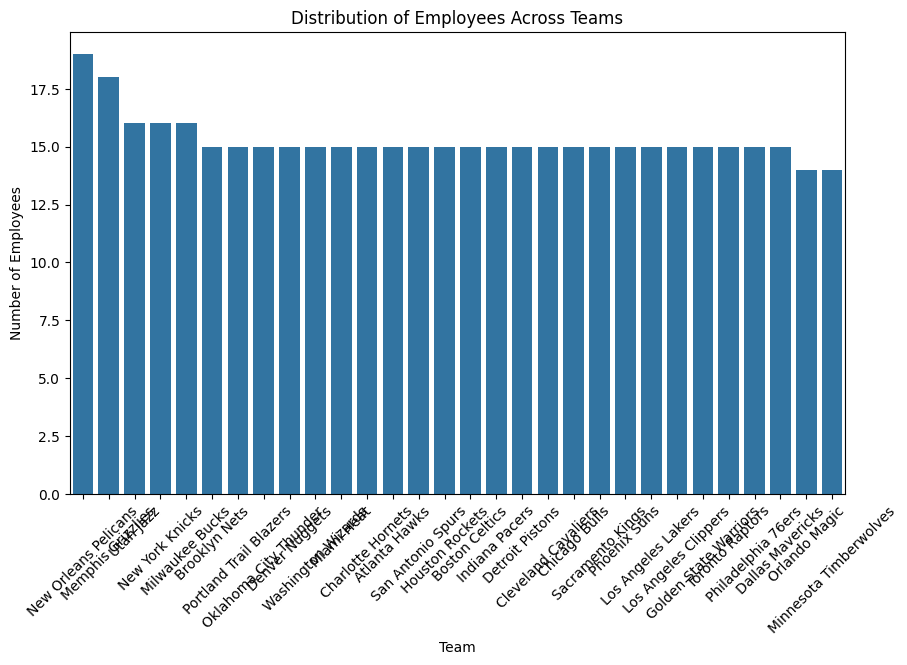

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for team distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=team_distribution.index, y=team_distribution['Count'])
plt.title('Distribution of Employees Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


Segregate employees based on their positions within the company.

In [ ]:
# Group by position and count the number of employees in each position
position_distribution = df['Position'].value_counts()
print(position_distribution)


Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


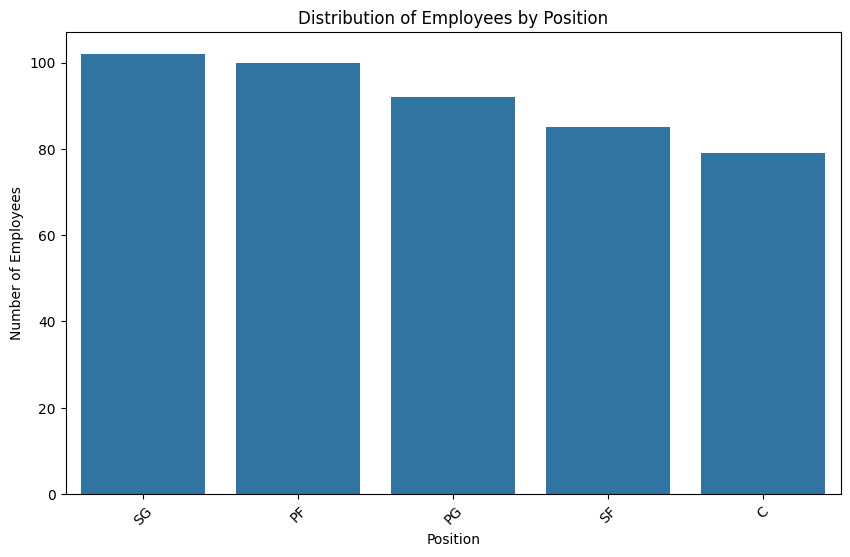

In [ ]:
# Bar plot for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_distribution.index, y=position_distribution.values)
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


Identify the predominant age group among employees

In [ ]:
# Create age bins and label them
age_bins = [18, 25, 30, 35, 40, 50, 60]
age_labels = ['18-25', '26-30', '31-35', '36-40', '41-50', '51-60']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Find the predominant age group
age_group_distribution = df['Age Group'].value_counts()
print(age_group_distribution)


Age Group
18-25    200
26-30    167
31-35     68
36-40     23
41-50      0
51-60      0
Name: count, dtype: int64


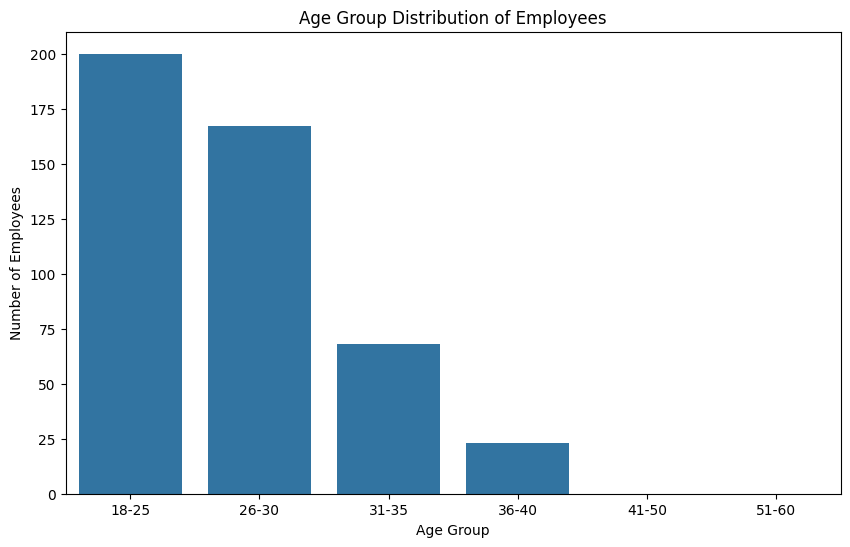

In [ ]:
# Bar plot for age group distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values)
plt.title('Age Group Distribution of Employees')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()


Discover which team and position have the highest salary expenditure

In [ ]:
# Group by team and position and calculate the total salary expenditure
team_salary_expenditure = df.groupby('Team')['Salary'].sum()
position_salary_expenditure = df.groupby('Position')['Salary'].sum()

# Find the team and position with the highest salary expenditure
highest_team_salary = team_salary_expenditure.idxmax(), team_salary_expenditure.max()
highest_position_salary = position_salary_expenditure.idxmax(), position_salary_expenditure.max()

print(f"Highest salary expenditure by team: {highest_team_salary}")
print(f"Highest salary expenditure by position: {highest_position_salary}")


Highest salary expenditure by team: ('Cleveland Cavaliers', 106988689.0)
Highest salary expenditure by position: ('C', 466377332.0)


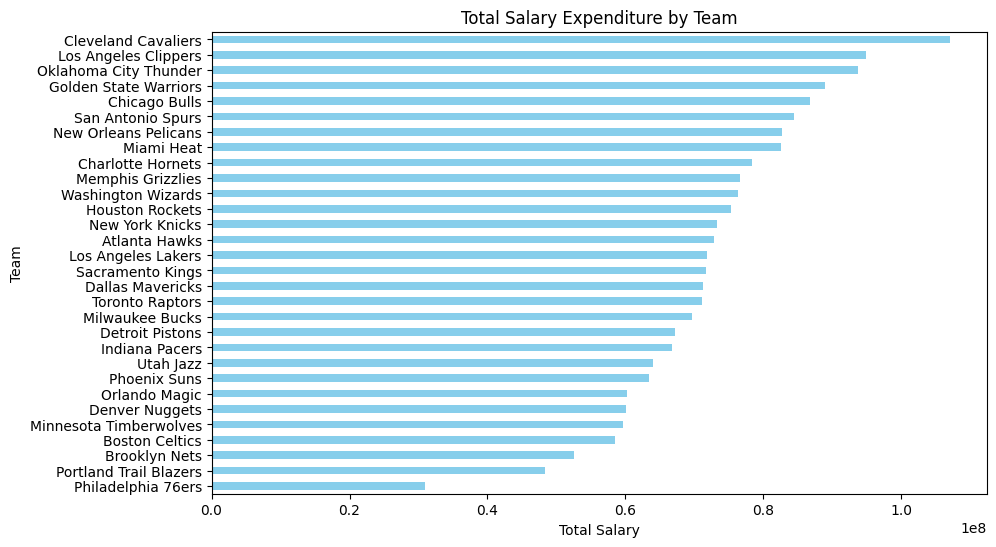

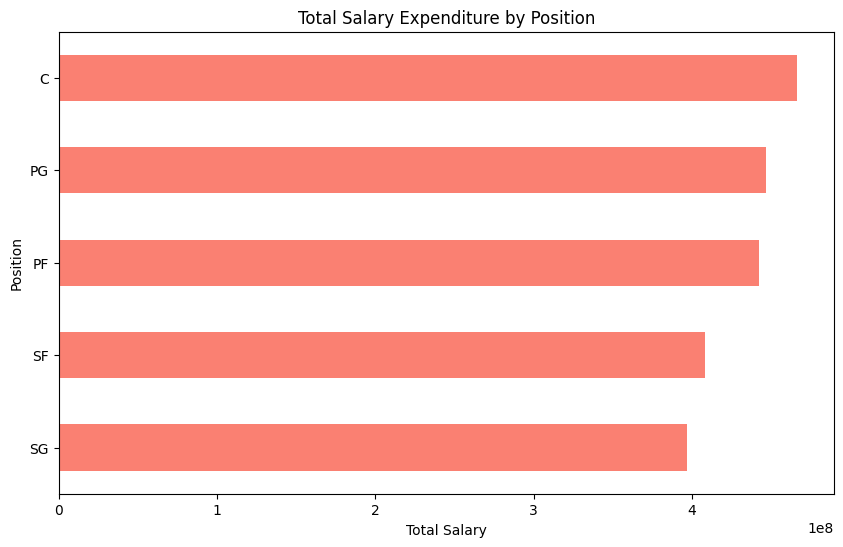

In [ ]:
# Bar plot for salary expenditure by team
plt.figure(figsize=(10, 6))
team_salary_expenditure.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Total Salary')
plt.ylabel('Team')
plt.show()

# Bar plot for salary expenditure by position
plt.figure(figsize=(10, 6))
position_salary_expenditure.sort_values().plot(kind='barh', color='salmon')
plt.title('Total Salary Expenditure by Position')
plt.xlabel('Total Salary')
plt.ylabel('Position')
plt.show()


Investigate if there's any correlation between age and salary, and represent it visually.

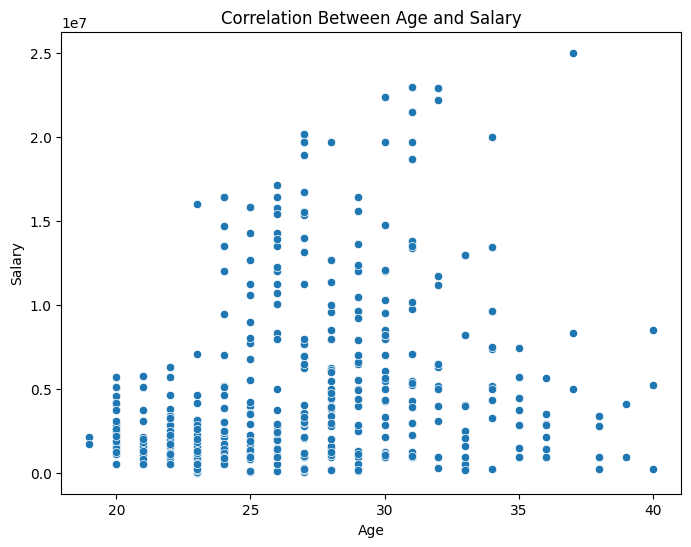

Correlation coefficient between Age and Salary: 0.21400941226570955


In [ ]:
# Calculate the correlation between age and salary
correlation = df[['Age', 'Salary']].corr()

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Correlation Between Age and Salary')
plt.show()

print(f"Correlation coefficient between Age and Salary: {correlation.iloc[0, 1]}")
